In [1]:
# A simple generator function
def my_gen(val):
    n = 1
    print('This is printed first', val)
    # Generator function contains yield statements
    yield n

    n += 1
    print('This is printed second', val)
    yield n

    n += 1
    print('This is printed at last', val)
    yield n

gen_a = my_gen("ja")
# Using for loop
for item in gen_a:
    print(item)    

#print(next(gen_b))

This is printed first ja
1
This is printed second ja
2
This is printed at last ja
3


# Leer Nombres

In [1]:
import re

#Leer los nombres de la data (RGB, profundida, tipo)
def leerNombresTrain(path, cantMaxima):
    f = open(path, 'r+')
    
    pathNombresRGB = []
    pathNombresDepth = []
    clases = []
    cant = 0
    for line in f.readlines():
        
        line = line.split(" ")
        pathNombresRGB.append("SilentsData/NoSilent_"+line[0])
        pathNombresDepth.append("SilentsData/NoSilent_"+line[1])
        clases.append( int( re.sub("\D", "", line[2]) ) -1 )
        
        cant = cant + 1
        if cant>=cantMaxima:
            break
        
    f.close()
    
    return pathNombresRGB, pathNombresDepth, clases

In [2]:
cantData = 5
pathNombresRGB, pathNombresDepth, clases = leerNombresTrain('../test_list.txt', cantData)
print(len(pathNombresRGB))
print(len(pathNombresDepth))
print(len(clases))
print(pathNombresRGB)
print(pathNombresDepth)
print(clases)

5
5
5
['SilentsData/NoSilent_test/001/M_00001.avi', 'SilentsData/NoSilent_test/001/M_00002.avi', 'SilentsData/NoSilent_test/001/M_00003.avi', 'SilentsData/NoSilent_test/001/M_00004.avi', 'SilentsData/NoSilent_test/001/M_00005.avi']
['SilentsData/NoSilent_test/001/K_00001.avi', 'SilentsData/NoSilent_test/001/K_00002.avi', 'SilentsData/NoSilent_test/001/K_00003.avi', 'SilentsData/NoSilent_test/001/K_00004.avi', 'SilentsData/NoSilent_test/001/K_00005.avi']
[37, 51, 189, 38, 195]


# Leer Video

In [3]:
import cv2
import numpy as np
import glob

#Se lee los videos rgb
def leer_una_seña_video(nombreVid):
    
    cap = cv2.VideoCapture('../'+nombreVid)
    vid = []
    while True:
        ret, img = cap.read()
        if not ret:
            break
        vid.append(cv2.resize(img, (160, 120)))    
        #vid.append(img)    
    return vid

# Dar formato a la data para entrenar

In [4]:
def recortarVideo(vid, tam):
    razon = len(vid)/tam
    vidR = []
    if (len(vid)<=0):
        return vidR
    for i in range(tam):
        vidR.append( vid[(int)(i*razon)] )
    del vid
    return vidR

In [5]:
def formatearVideo(vid):
    vid = np.array(vid)
    return vid

In [6]:
def juntarRGBandDepth(rgb, depth):
    return np.array( np.concatenate((rgb, depth)) )

In [7]:
def combinar(vid):
    resp = []
    resp.append(vid[0])
    resp.append(vid[3])
    resp.append(vid[1])
    resp.append(vid[4])
    resp.append(vid[2])
    resp.append(vid[5])
    return np.array(resp)

In [8]:
def espejoVideo(vid):
    vidNew = []
    for img in vid:
        vidNew.append( cv2.flip( img, 1 ) )
    del vid
    return vidNew

In [9]:
cantFrames = 16
bach_size = 8

In [10]:
cantData = 150
pathNombresRGB, pathNombresDepth, clases = leerNombresTrain('../train_list.txt', cantData)
len(pathNombresRGB)

150

In [11]:
vidRGB = leer_una_seña_video(pathNombresRGB[0])   
vidRGB = recortarVideo(vidRGB, cantFrames)
vidRGB = formatearVideo(vidRGB)
print(vidRGB.shape)
vidRGB = vidRGB.transpose((3, 0, 1, 2))
vidRGB = vidRGB/256
            
vidDepth = leer_una_seña_video(pathNombresDepth[0])
vidDepth = recortarVideo(vidDepth, cantFrames)
vidDepth = formatearVideo(vidDepth)
vidDepth = vidDepth.transpose((3, 0, 1, 2))
vidDepth = vidDepth/256

vid = juntarRGBandDepth(vidRGB, vidDepth)
print(vid.shape)
vid2 = combinar(vid)
print(vid2.shape)

(16, 120, 160, 3)
(6, 16, 120, 160)
(6, 16, 120, 160)


In [12]:
from keras import utils
dataY_Entrada = utils.to_categorical(clases)
dataY_Entrada.shape

Using TensorFlow backend.


(150, 239)

In [13]:
def my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size):
    i = 0
    boolEspejo = False
    while True:
        
        
        
        dataX = []
        dataY = []
        
        for _ in range(bach_size):
            
            #if(i >= cantData*2):
            if(i >= cantData):
                i=0
            '''
            if (boolEspejo):
                vidRGB = leer_una_seña_video(pathNombresRGB[(int)(i/2)])        
                vidRGB = recortarVideo(vidRGB, cantFrames)
                vidRGB = espejoVideo(vidRGB)
                vidRGB = formatearVideo(vidRGB)
                vidRGB = vidRGB.transpose((3, 0, 1, 2))

                vidDepth = leer_una_seña_video(pathNombresDepth[(int)(i/2)])
                vidDepth = recortarVideo(vidDepth, cantFrames)
                vidDepth = espejoVideo(vidDepth)
                vidDepth = formatearVideo(vidDepth)
                vidDepth = vidDepth.transpose((3, 0, 1, 2))

                vid = juntarRGBandDepth(vidRGB, vidDepth)
                vid.shape

                boolEspejo = False

            else:
                vidRGB = leer_una_seña_video(pathNombresRGB[(int)(i/2)])        
                vidRGB = recortarVideo(vidRGB, cantFrames)
                vidRGB = formatearVideo(vidRGB)
                vidRGB = vidRGB.transpose((3, 0, 1, 2))

                vidDepth = leer_una_seña_video(pathNombresDepth[(int)(i/2)])
                vidDepth = recortarVideo(vidDepth, cantFrames)
                vidDepth = formatearVideo(vidDepth)
                vidDepth = vidDepth.transpose((3, 0, 1, 2))

                vid = juntarRGBandDepth(vidRGB, vidDepth)
                vid.shape           

                boolEspejo = True
                '''
            
            vidRGB = leer_una_seña_video(pathNombresRGB[i])        
            vidRGB = recortarVideo(vidRGB, cantFrames)
            vidRGB = formatearVideo(vidRGB)
            vidRGB = vidRGB.transpose((3, 0, 1, 2))
            vidRGB = vidRGB/256
            

            vidDepth = leer_una_seña_video(pathNombresDepth[i])
            vidDepth = recortarVideo(vidDepth, cantFrames)
            vidDepth = formatearVideo(vidDepth)
            vidDepth = vidDepth.transpose((3, 0, 1, 2))
            vidDepth = vidDepth/256

            vid = juntarRGBandDepth(vidRGB, vidDepth)
            vid = combinar(vid)
            
            dataX.append(vid)
            valY = dataY_Entrada[i]
            #valY = dataY_Entrada[(int)(i/2)]
            dataY.append(valY)
            
            
            i += 1
        yield np.array(dataX), np.array(dataY)

In [14]:
#gen_a = my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size)

In [15]:
'''
vids = []
for i in range(10):
    res = next(gen_a)
    print(res[0].shape)
'''

'\nvids = []\nfor i in range(10):\n    res = next(gen_a)\n    print(res[0].shape)\n'

In [16]:
#gen_a = my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size)

In [17]:
'''
import matplotlib.pyplot as plt
%matplotlib inline

res = next(gen_a)

fig = plt.figure()

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(res[0][0][i])
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nres = next(gen_a)\n\nfig = plt.figure()\n\nfor i in range(16):\n    plt.subplot(4, 4, i+1)\n    plt.imshow(res[0][0][i])\nplt.show()\n'

# Entrenar

In [18]:
import numpy as np

bach_size = 32
cantFrames = 16

cantData_T = 35878
pathNombresRGB_T, pathNombresDepth_T, clases_T = leerNombresTrain('../train_list.txt', cantData_T)
print(len(pathNombresRGB_T))
dataY_Entrada_T = utils.to_categorical(clases_T)
dataY_Entrada_T.shape

cantData_V = 5784
pathNombresRGB_V, pathNombresDepth_V, clases_V = leerNombresTrain('../valid_list.txt', cantData_V)
print(len(pathNombresRGB_V))
dataY_Entrada_V = utils.to_categorical(clases_V)
dataY_Entrada_V.shape


# Generators
training_generator = my_generator(pathNombresRGB_T, pathNombresDepth_T, cantFrames, cantData_T, dataY_Entrada_T, bach_size)
validation_generator = my_generator(pathNombresRGB_V, pathNombresDepth_V, cantFrames, cantData_V, dataY_Entrada_V, bach_size)
#training_generator = DataGenerator(partition['train'], labels, **params)
#validation_generator = DataGenerator(partition['validation'], labels, **params)



35878
5784


## Modelo

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling3D, ZeroPadding3D, Conv3D
from keras.optimizers import SGD, Adam
from keras.layers import LSTM
from keras.models import Model
from keras.layers import Input, Activation, Embedding, merge, LSTM, Dropout, Dense, RepeatVector, BatchNormalization, \
    TimeDistributed, Flatten, Reshape

In [20]:
def get_model(summary=False):
    """ Return the Keras model of the network
    """
    model = Sequential()
    # 1st layer group
    model.add(Conv3D(64, (3, 3, 3), activation='relu', 
                            padding='same', name='conv1',
                            strides=(1, 1, 1), 
                            input_shape=(6, 16, 120, 160)))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                           padding='same', name='pool1'))
    # 2nd layer group
    model.add(Conv3D(128, (3, 3, 3), activation='relu', 
                            padding='same', name='conv2',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           padding='same', name='pool2'))
    # 3rd layer group
    model.add(Conv3D(256, (3, 3, 3), activation='relu', 
                            padding='same', name='conv3a',
                            strides=(1, 1, 1)))
    model.add(Conv3D(256, (3, 3, 3), activation='relu', 
                            padding='same', name='conv3b',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           padding='same', name='pool3'))
    # 4th layer group
    model.add(Conv3D(512, (3, 3, 3), activation='relu', 
                            padding='same', name='conv4a',
                            strides=(1, 1, 1)))
    model.add(Conv3D(512, (3, 3, 3), activation='relu', 
                            padding='same', name='conv4b',
                            strides=(1, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           padding='same', name='pool4'))
    # 5th layer group
    model.add(Conv3D(512, (3, 3, 3), activation='relu', 
                            padding='same', name='conv5a',
                            strides=(1, 1, 1)))
    model.add(Conv3D(512, (3, 3, 3), activation='relu', 
                            padding='same', name='conv5b',
                            strides=(1, 1, 1)))
    #model.add(ZeroPadding3D(padding=(0, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                           padding='same', name='pool5'))
    model.add(Flatten())
    # FC layers group
    model.add(Dense(4096, activation='relu', name='fc6'))
    model.add(Dropout(.5))
    model.add(Dense(4096, activation='relu', name='fc7'))
    model.add(Dropout(.5))
    model.add(Dense(249, activation='softmax', name='fc8'))
    
    if summary:
        print(model.summary())
    return model

model = get_model(summary=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 6, 16, 120, 64)    276544    
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 6, 8, 60, 64)      0         
_________________________________________________________________
conv2 (Conv3D)               (None, 6, 8, 60, 128)     221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 3, 4, 30, 128)     0         
_________________________________________________________________
conv3a (Conv3D)              (None, 3, 4, 30, 256)     884992    
_________________________________________________________________
conv3b (Conv3D)      

In [21]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=Adam(),
              metrics=['acc'])

In [22]:
from keras.callbacks import TensorBoard

#cantDataDoble_T = cantData_T*2
#cantDataDoble_V = cantData_V*2

cantDataDoble_T = cantData_T
cantDataDoble_V = cantData_V


result_train = model.fit_generator(
    generator=training_generator,
    epochs=20,
    steps_per_epoch=cantDataDoble_T // bach_size,
    validation_data=validation_generator,
    validation_steps=cantDataDoble_V // bach_size)
'''

result_train = model.fit_generator(
    generator=training_generator,
    epochs=20,
    steps_per_epoch=cantDataDoble_T // bach_size)
'''

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1121/1121 [==============================] - 1798s 2s/step - loss: 5.4263 - acc: 0.0236 - val_loss: 5.4929 - val_acc: 0.0217
Epoch 2/20
1121/1121 [==============================] - 1723s 2s/step - loss: 5.4139 - acc: 0.0237 - val_loss: 5.4949 - val_acc: 0.0217
Epoch 3/20
1121/1121 [==============================] - 1742s 2s/step - loss: 5.4128 - acc: 0.0237 - val_loss: 5.4935 - val_acc: 0.0217
Epoch 4/20
1121/1121 [==============================] - 1651s 1s/step - loss: 5.4120 - acc: 0.0237 - val_loss: 5.4941 - val_acc: 0.0215
Epoch 5/20
1121/1121 [==============================] - 1647s 1s/step - loss: 5.4111 - acc: 0.0237 - val_loss: 5.4936 - val_acc: 0.0217
Epoch 6/20
1121/1121 [==============================] - 1642s 1s/step - loss: 5.4107 - acc: 0.0237 - val_loss: 5.4944 - val_acc: 0.0214
Epoch 7/20
1121/1121 [==============================] - 1649s 1s/step - loss: 5.4100 - acc: 0.0237 - val_loss: 5.4939 - val_acc: 0.0217


'\n\nresult_train = model.fit_generator(\n    generator=training_generator,\n    epochs=20,\n    steps_per_epoch=cantDataDoble_T // bach_size)\n'

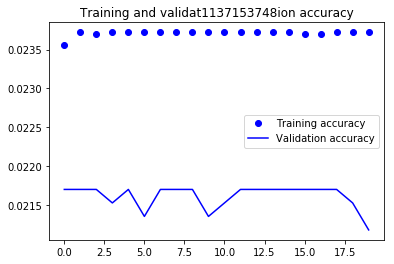

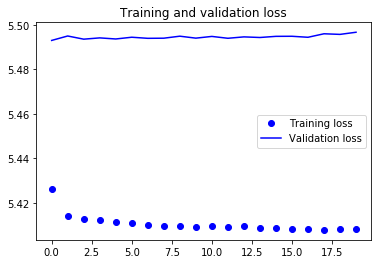

In [24]:
import matplotlib.pyplot as plt
accuracy = result_train.history['acc']
val_accuracy = result_train.history['val_acc']
loss = result_train.history['loss']
val_loss = result_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validat1137153748ion accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.show()

In [23]:
import h5py

model.save_weights('RNN_isolate_weights_D.h5', overwrite=True)
json_string = model.to_json()
with open('RNN_isolate_model_D.json', 'w') as f:
    f.write(json_string)